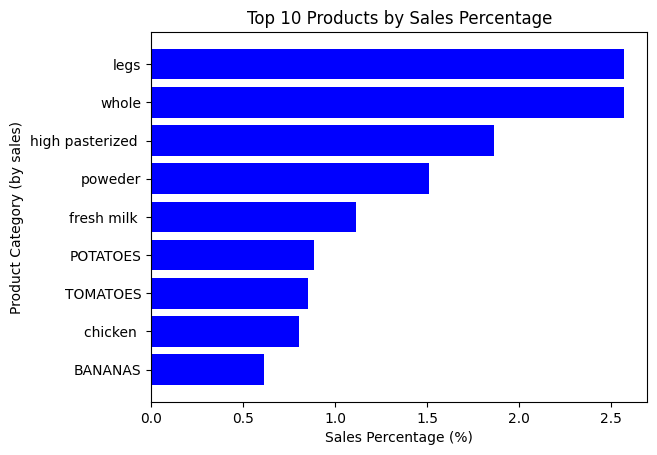

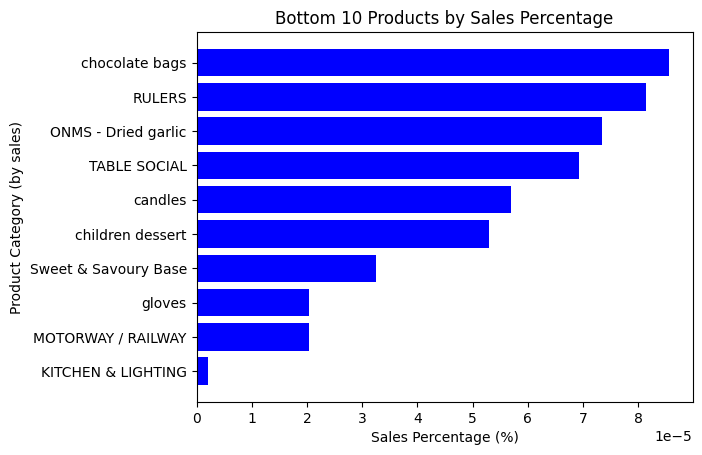

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('merged-data-COMBINED-WOL.csv')

product_sales = df.groupby('Barcode').apply(lambda x: (x['Sum_Value'] * x['Sum_Units']).sum()).reset_index(name='Total_Sales')
total_sales = (df['Sum_Value'] * df['Sum_Units']).sum()

product_sales['Sales_Percentage'] = product_sales['Total_Sales'] / total_sales * 100

product_categories = df[['Barcode', 'CategoryDDescription']].drop_duplicates()
product_sales = pd.merge(product_sales, product_categories, on='Barcode', how='left')

product_sales = product_sales.sort_values('Sales_Percentage', ascending=False)

top_products = product_sales.head(10)
plt.barh(top_products['CategoryDDescription'], top_products['Sales_Percentage'], color='blue')
plt.gca().invert_yaxis()
plt.title('Top 10 Products by Sales Percentage')
plt.xlabel('Sales Percentage (%)')
plt.ylabel('Product Category (by sales)')
plt.show()

bottom_products = product_sales.tail(10)
plt.barh(bottom_products['CategoryDDescription'], bottom_products['Sales_Percentage'], color='blue')
plt.gca().invert_yaxis()
plt.title('Bottom 10 Products by Sales Percentage')
plt.xlabel('Sales Percentage (%)')
plt.ylabel('Product Category (by sales)')
plt.show()


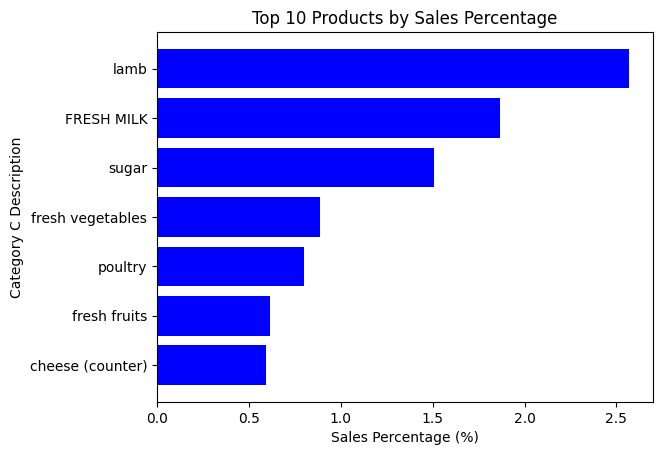

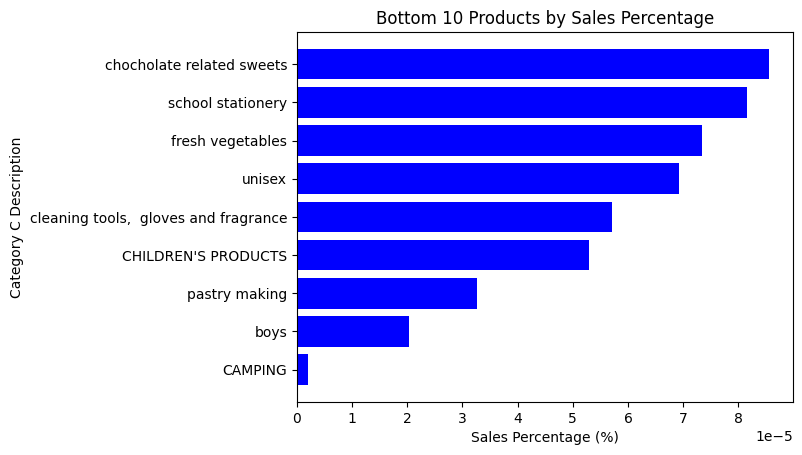

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('merged-data-COMBINED-WOL.csv')

product_sales = df.groupby(['Barcode', 'CategoryCDescription']).apply(lambda x: (x['Sum_Value'] * x['Sum_Units']).sum()).reset_index(name='Total_Sales')

total_sales = (df['Sum_Value'] * df['Sum_Units']).sum()
product_sales['Sales_Percentage'] = product_sales['Total_Sales'] / total_sales * 100

product_sales = product_sales.sort_values('Sales_Percentage', ascending=False)

top_products = product_sales.head(10)
plt.barh(top_products['CategoryCDescription'], top_products['Sales_Percentage'], color='blue')
plt.title('Top 10 Products by Sales Percentage')
plt.xlabel('Sales Percentage (%)')
plt.ylabel('Category C Description')
plt.gca().invert_yaxis() 
plt.show()

bottom_products = product_sales.tail(10)
plt.barh(bottom_products['CategoryCDescription'], bottom_products['Sales_Percentage'], color='blue')
plt.title('Bottom 10 Products by Sales Percentage')
plt.xlabel('Sales Percentage (%)')
plt.ylabel('Category C Description')
plt.gca().invert_yaxis() 
plt.show()
